## Hecho por : Johan Suarez y Kalia Gonzalez

Ejercicio1: Newton Rapson 2D

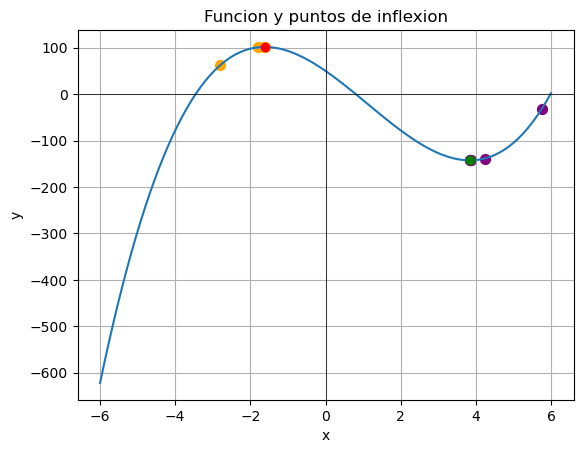

In [ ]:
import sympy as sp 
import numpy as np
import matplotlib.pyplot as plt

#Definiremos la funcion usando sympy 
x = sp.symbols('x') 
#Creamos la funcion 
funcion = 3*x**3-10*x**2-56*x+50  
#Primera derivada 
derivada = sp.diff(funcion,x) 
#Segunda derivada 
derivada2 = sp.diff(derivada,x) 

#Formula Newton-Raphson 
#Entran como parametros el valor inicial y la tolerancia
def Newton_Raphson(x0,a): 
    lista = [] 
    i = 1 
    xi = x0 
    convergencia = 0.001 
    while abs(derivada.subs(x,xi) ) > convergencia:
        xi1 = xi - a*(derivada.subs(x,xi)/derivada2.subs(x,xi)) 
        lista.append(xi1) 
        xi=xi1 
    return xi,lista 

#Usamoa dos valores iniciales para x 
x0 = 0
x1 = 2 
#Usamos la funcion de Newton-Raphson para encontrar minimos y maximos 
inflection1 , x_list0 = Newton_Raphson(x0,1) 
inflection2 , x_list1 = Newton_Raphson(x1,1)
#Graficamos la funcion
funcionNumerica = sp.lambdify(x,funcion,'numpy') 
#Generamos valores de x y y
valores_x = np.linspace(-6,6,100) 
valores_y = funcionNumerica(valores_x) 

plt.plot(valores_x,valores_y) 
#Graficar punts de inflexion 
inflection1 = float(inflection1) 
inflection2 = float(inflection2) 
inflection1_y = funcionNumerica(inflection1) 
inflection2_y = funcionNumerica(inflection2)

plt.scatter(inflection1,inflection1_y,c='red', zorder=5, label='Maximo') 
plt.scatter(inflection2,inflection2_y,c='green', zorder=5, label='Minimo') 

#Mostrar iteracion del metodo de Newton-Raphson 
x_list0 = np.array(x_list0, dtype=float) 
x_list1 = np.array(x_list1, dtype=float) 
y_list0 = funcionNumerica(x_list0)  
y_list1 = funcionNumerica(x_list1) 


plt.scatter(x_list0,y_list0,s = 50,c='orange') 
plt.scatter(x_list1,y_list1,s = 50,c='purple') 


#Hcaemos grafica del plano 
plt.axhline(0,color='black', linewidth=0.5) 
plt.axvline(0,color='black', linewidth=0.5) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Funcion y puntos de inflexion') 
plt.grid(True) 
plt.show()



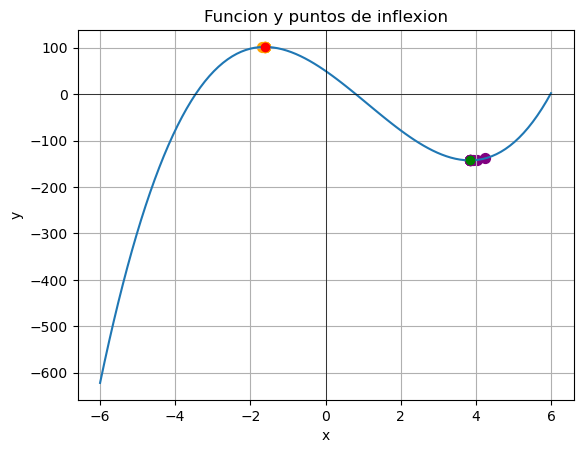

In [ ]:
#Ahora, hacemos el mismpo proceso pero con un valor de 0,6 para la tolerancia 
#Usamoa dos valores iniciales para x 
x0 = 0
x1 = 2 
#Usamos la funcion de Newton-Raphson para encontrar minimos y maximos 
inflection1 , x_list0 = Newton_Raphson(x0,0.6) 
inflection2 , x_list1 = Newton_Raphson(x1,0.6)
#Graficamos la funcion
funcionNumerica = sp.lambdify(x,funcion,'numpy') 
#Generamos valores de x y y
valores_x = np.linspace(-6,6,100) 
valores_y = funcionNumerica(valores_x) 

plt.plot(valores_x,valores_y) 
#Graficar punts de inflexion 
inflection1 = float(inflection1) 
inflection2 = float(inflection2) 
inflection1_y = funcionNumerica(inflection1) 
inflection2_y = funcionNumerica(inflection2)

plt.scatter(inflection1,inflection1_y,c='red', zorder=5, label='Maximo') 
plt.scatter(inflection2,inflection2_y,c='green', zorder=5, label='Minimo') 

#Mostrar iteracion del metodo de Newton-Raphson 
x_list0 = np.array(x_list0, dtype=float) 
x_list1 = np.array(x_list1, dtype=float) 
y_list0 = funcionNumerica(x_list0)  
y_list1 = funcionNumerica(x_list1) 


plt.scatter(x_list0,y_list0,s = 50,c='orange') 
plt.scatter(x_list1,y_list1,s = 50,c='purple') 


#Hcaemos grafica del plano 
plt.axhline(0,color='black', linewidth=0.5) 
plt.axvline(0,color='black', linewidth=0.5) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Funcion y puntos de inflexion') 
plt.grid(True) 
plt.show()


 Ejercicio 2: Análisis de Extremos Globales y Locales

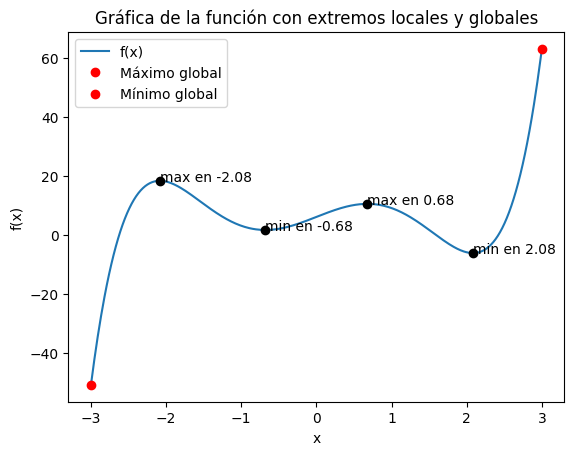

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función y sus derivadas
def funcion(x):
    return x**5 - 8*x**3 + 10*x + 6

def primera_derivada(x):
    return 5*x**4 - 24*x**2 + 10

def segunda_derivada(x):
    return 20*x**3 - 48*x

# Método de Newton-Raphson con verificación de división por cero
def newton_raphson(func, derivada, x0, tol=1e-6, max_iter=100):
    for _ in range(max_iter):
        derivada_x0 = derivada(x0)
        if abs(derivada_x0) < tol:  # Evitar división por cero
            break
        x1 = x0 - func(x0) / derivada_x0
        if abs(x1 - x0) < tol:
            return x1
        x0 = x1
    return x0

# Encontrar todos los extremos locales
puntos_iniciales = [-2, -1, 0, 1, 2]
puntos_criticos = []
for x0 in puntos_iniciales:
    pc = newton_raphson(primera_derivada, segunda_derivada, x0)
    if pc is not None:
        puntos_criticos.append(pc)
puntos_criticos = list(set(puntos_criticos))  # Eliminar duplicados

# Clasificar los puntos críticos
extremos_locales = []
for x in puntos_criticos:
    if segunda_derivada(x) > 0:
        extremos_locales.append((x, 'min'))
    elif segunda_derivada(x) < 0:
        extremos_locales.append((x, 'max'))

# Identificar el máximo y mínimo global
valores_x = np.linspace(-3, 3, 400)
valores_y = funcion(valores_x)
maximo_global = max(valores_y)
minimo_global = min(valores_y)

# Graficar la función
plt.plot(valores_x, valores_y, label='f(x)')
for x, tipo_extremo in extremos_locales:
    plt.plot(x, funcion(x), 'ko')
    plt.text(x, funcion(x), f'{tipo_extremo} en {x:.2f}')
plt.plot(valores_x[np.argmax(valores_y)], maximo_global, 'ro', label='Máximo global')
plt.plot(valores_x[np.argmin(valores_y)], minimo_global, 'ro', label='Mínimo global')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función con extremos locales y globales')
plt.show()

Ejercicio 3: Newton Rapshon Multidimensional

El mínimo se encuentra en: (1.0000000000000187, 1.0000000000000375) con valor de la función: 3.5281803986009753e-28


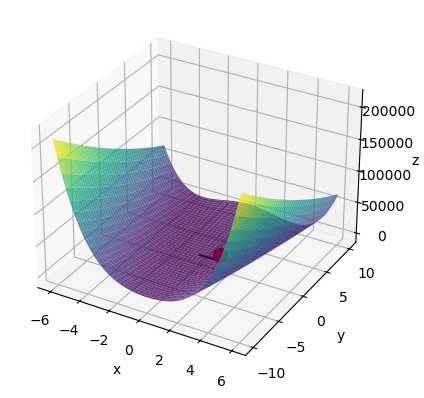

In [ ]:
import sympy as sp 
import numpy as np
import matplotlib.pyplot as plt 

#Definimos la funcion usando sympy 
x,y = sp.symbols('x y') 
#Creamos la funcion 
funcion = (x-1)**2 + 100*(y-x**2)**2 
#Calculamos el gradiente 
gradiente = [sp.diff(funcion,var) for var in (x,y)] 
hessiana = sp.Matrix([[sp.diff(g,var) for var in (x,y)] for g in gradiente]) 

#Usamos lambdify para convertir la funcion en una funcion numerica 
gradiente_funcion = sp.lambdify((x,y),gradiente,'numpy') 
hessiana_funcion = sp.lambdify((x,y),hessiana,'numpy') 

#Aplicamos el metodo de Newton-Raphson 
def Newton_Raphson_Multidimensional(x0, y0 , alpha = 1, tole = 1e-6, maxIteraciones = 100):
    x_lista = [] 
    xi,yi = x0,y0 
    for i in range (maxIteraciones): 
        valor_gradiente = np.array(gradiente_funcion(xi,yi),dtype=float) 
        valor_hessiana = np.array(hessiana_funcion(xi,yi),dtype=float) 
        delta = np.linalg.solve(valor_hessiana,-valor_gradiente) 
        xi,yi = xi + alpha*delta[0], yi + alpha*delta[1]
        x_lista.append((xi,yi)) 
        if np.linalg.norm(delta) < tole: 
            break 
    return xi,yi,x_lista
#Utilizamos puntos iniciales 
xMin, yMin, lista = Newton_Raphson_Multidimensional(0,10)  
#Ponemos los valores de x y y en la funcion 
valores_x = np.linspace(-6,6,100) 
valores_y = np.linspace(-10,10,100)  
x_mesh, y_mesh = np.meshgrid(valores_x, valores_y) 

#Calculamos los valores de la funcion 
z_funcion = sp.lambdify((x,y),funcion,'numpy') 
z_mesh = z_funcion(x_mesh,y_mesh) 

#Graficamos la funcion 
figura = plt.figure() 
ax = figura.add_subplot(111,projection='3d') 
ax.plot_surface(x_mesh,y_mesh,z_mesh,cmap='viridis', alpha = 0.8) 
ax.scatter(xMin,yMin,z_funcion(xMin,yMin),c='red',s=100) 

#Graficamos la trayectoria 
x_lista = [p[0] for p in lista]
y_lista = [p[1] for p in lista] 
z_lista = [z_funcion(p[0],p[1]) for p in lista] 
ax.plot(x_lista,y_lista,z_lista,c='black') 
#oimprimir coordenadas 
print(f'El mínimo se encuentra en: ({xMin}, {yMin}) con valor de la función: {z_funcion(xMin, yMin)}')
#Ejes 
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z') 
plt.show()

  
    


Funcion en 4D

En esta seccion, se realizara la segunda parte del punto 3

El mínimo se encuentra en: (1.0, 2.0, 3.0) con valor de la función: 0.0


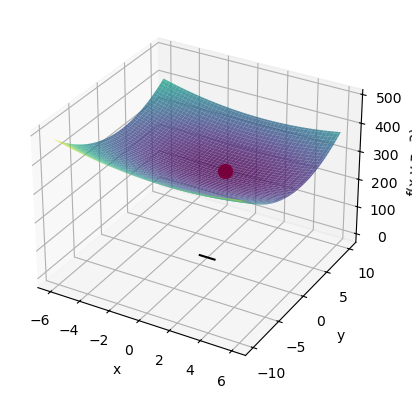

In [ ]:
import sympy as sp 
import numpy as np
import matplotlib.pyplot as plt 
#Definimos la funcion usando sympy 
x,y,z = sp.symbols('x y z') 
#Creamos la funcion 
funcion = (x-1)**2 + (y-2)**2 + (z-3)**2 
#Calculamos el gradiente 
gradiente = [sp.diff(funcion,var) for var in (x,y,z)] 
hessiana = sp.Matrix([[sp.diff(g,var) for var in (x,y,z)] for g in gradiente]) 
#Usamos lambdify para convertir la funcion en una funcion numerica 
gradiente_funcion = sp.lambdify((x,y,z),gradiente,'numpy') 
hessiana_funcion = sp.lambdify((x,y,z),hessiana,'numpy') 
#Aplicamos el metodo de Newton-Raphson 
def Newton_Raphson_Multidimensional(x0, y0, z0, alpha = 1, tole = 1e-6, maxIteraciones = 100):
    x_lista = [] 
    xi,yi,zi = x0,y0,z0 
    for i in range (maxIteraciones): 
        valor_gradiente = np.array(gradiente_funcion(xi,yi,zi),dtype=float) 
        valor_hessiana = np.array(hessiana_funcion(xi,yi,zi),dtype=float) 
        delta = np.linalg.solve(valor_hessiana,-valor_gradiente) 
        xi,yi,zi = xi + alpha*delta[0], yi + alpha*delta[1], zi + alpha*delta[2]
        x_lista.append((xi,yi,zi)) 
        if np.linalg.norm(delta) < tole: 
            break 
    return xi,yi,zi,x_lista 
#Utilizamos puntos iniciales 
xMin, yMin, zMin, lista = Newton_Raphson_Multidimensional(0,10,20) 
#Ponemos los valores de x y y en la funcion  
valores_x = np.linspace(-6,6,100) 
valores_y = np.linspace(-10,10,100) 
valores_z = np.linspace(-20,20,100)
x_mesh, y_mesh = np.meshgrid(valores_x, valores_y) 
z_fijo = 20 
#Calculamos los valores de la funcion
w_funcion = sp.lambdify((x,y,z),funcion,'numpy') 
w_mesh = w_funcion(x_mesh,y_mesh,z_fijo) 
#Graficamos la funcion 
figura = plt.figure() 
ax = figura.add_subplot(111,projection='3d') 
ax.plot_surface(x_mesh,y_mesh,w_mesh,cmap='viridis', alpha = 0.8) 
ax.scatter(xMin,yMin,w_funcion(xMin,yMin,z_fijo),c='red',s=100) 
#Graficamos la trayectoria 
x_lista = [p[0] for p in lista] 
y_lista = [p[1] for p in lista] 
z_lista = [p[2] for p in lista] 
w_lista = [w_funcion(p[0],p[1],p[2]) for p in lista] 
ax.plot(x_lista,y_lista,z_lista,w_lista,c='black') 
#Imprimir coordenadas
print(f'El mínimo se encuentra en: ({xMin}, {yMin}, {zMin}) con valor de la función: {w_funcion(xMin, yMin, zMin)}') 
#Ejes 
ax.set_xlabel('x') 
ax.set_ylabel('y') 
ax.set_zlabel('f(x,y,z=3)') 
plt.show() 



Ejercicio 4:  Gradiente Descendente en Optimización

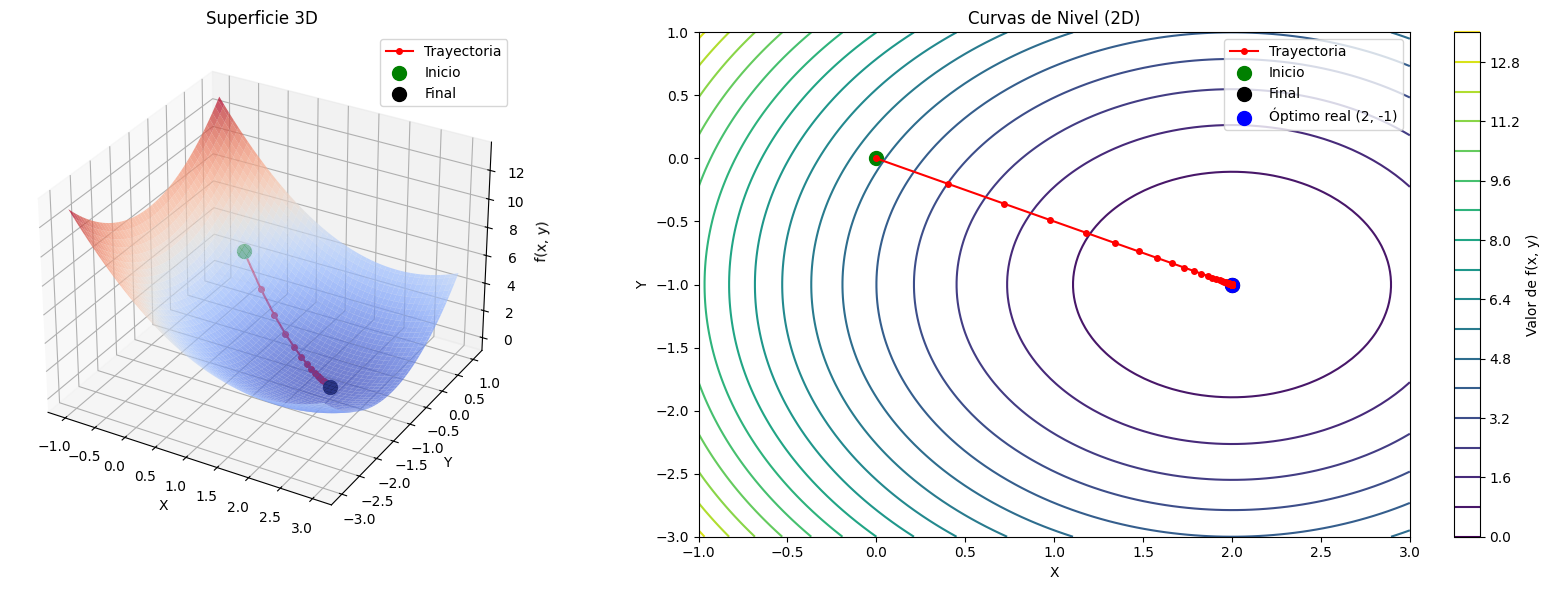

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Definir función y gradiente
def funcion(x, y):
    return (x - 2)**2 + (y + 1)**2

def gradiente(x, y):
    return np.array([2*(x - 2), 2*(y + 1)])

# Parámetros del algoritmo
x0 = np.array([0.0, 0.0])  # Punto inicial
alpha = 0.1                # Tamaño de paso
epsilon = 1e-6             # Tolerancia
N_max = 100                # Iteraciones máximas

# Gradiente descendente 
trayectoria = [x0.copy()]
k = 0
while True:
    g_k = gradiente(x0[0], x0[1])
    x_k1 = x0 - alpha * g_k
    trayectoria.append(x_k1.copy())
    
    if np.linalg.norm(g_k) < epsilon or k >= N_max:
        break
    x0 = x_k1
    k += 1

trayectoria = np.array(trayectoria)

x = np.linspace(-1, 3, 100)
y = np.linspace(-3, 1, 100)
X, Y = np.meshgrid(x, y)
Z = funcion(X, Y)

fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.7)
z_tray = funcion(trayectoria[:, 0], trayectoria[:, 1])
ax1.plot(trayectoria[:, 0], trayectoria[:, 1], z_tray, 'r.-', markersize=8, label='Trayectoria')
ax1.scatter(trayectoria[0, 0], trayectoria[0, 1], z_tray[0], color='green', s=100, label='Inicio')
ax1.scatter(trayectoria[-1, 0], trayectoria[-1, 1], z_tray[-1], color='black', s=100, label='Final')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('Superficie 3D')
ax1.legend()

ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.plot(trayectoria[:, 0], trayectoria[:, 1], 'r.-', markersize=8, label='Trayectoria')
ax2.scatter(trayectoria[0, 0], trayectoria[0, 1], color='green', s=100, label='Inicio')
ax2.scatter(trayectoria[-1, 0], trayectoria[-1, 1], color='black', s=100, label='Final')
ax2.scatter(2, -1, color='blue', s=100, label='Óptimo real (2, -1)')  # Mínimo real
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Curvas de Nivel (2D)')
ax2.legend()
plt.colorbar(contour, ax=ax2, label='Valor de f(x, y)')

plt.tight_layout()
plt.show()

Parte B

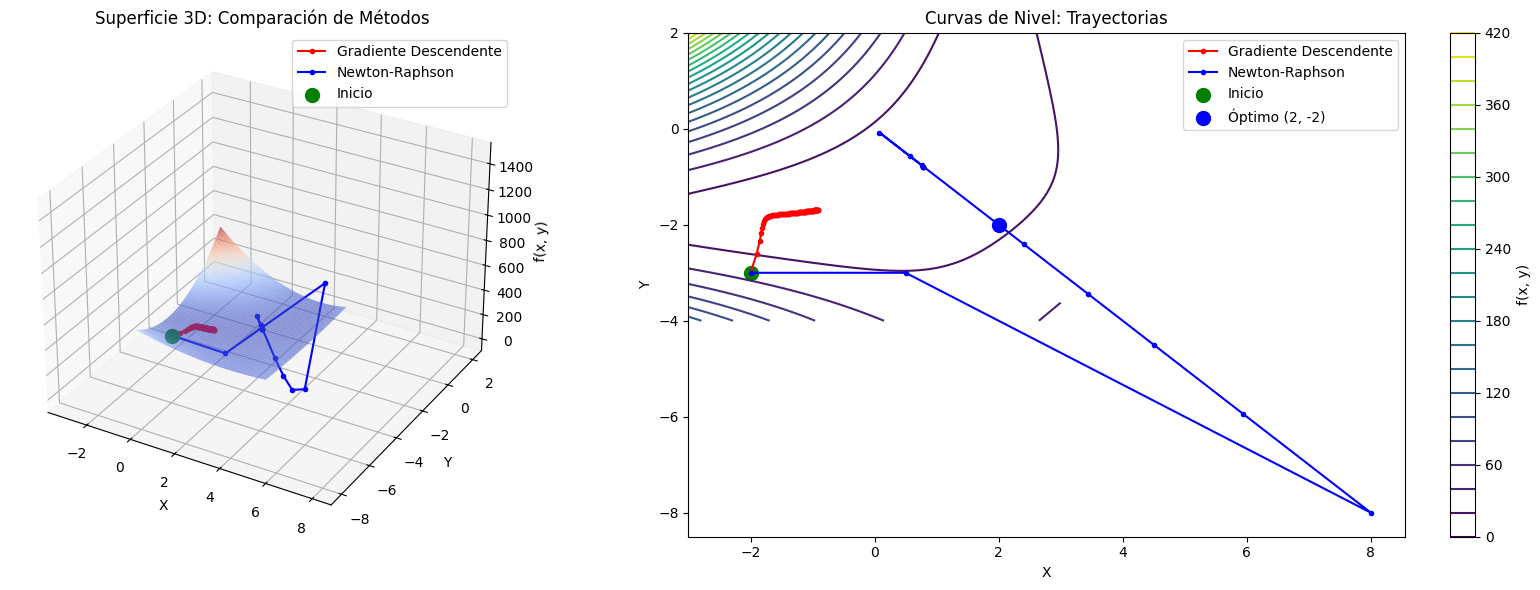

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Definir la función, gradiente y Hessiana
def funcion(x, y):
    return (x-2)**2 * (y+2)**2 + (x+1)**2 + (y-1)**2

def gradiente(x, y):
    df_dx = 2*(x-2)*(y+2)**2 + 2*(x+1)
    df_dy = 2*(x-2)**2*(y+2) + 2*(y-1)
    return np.array([df_dx, df_dy])

def hessiana(x, y):
    d2f_dx2 = 2*(y+2)**2 + 2
    d2f_dy2 = 2*(x-2)**2 + 2
    d2f_dxdy = 4*(x-2)*(y+2)
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

# Parámetros comunes
x0 = np.array([-2.0, -3.0])
epsilon = 1e-6
N_max = 100

# Gradiente Descendente
alpha = 0.01
trayectoria_gd = [x0.copy()]
k_gd = 0
while True:
    g_k = gradiente(*x0)
    x_k1 = x0 - alpha * g_k
    trayectoria_gd.append(x_k1.copy())
    
    if np.linalg.norm(g_k) < epsilon or k_gd >= N_max:
        break
    x0 = x_k1
    k_gd += 1

# Newton-Raphson
x0 = np.array([-2.0, -3.0])  # Reiniciar punto inicial
trayectoria_nr = [x0.copy()]
k_nr = 0
while True:
    g_k = gradiente(*x0)
    H_k = hessiana(*x0)
    try:
        delta = np.linalg.solve(H_k, -g_k)  # Resolver H·Δ = -∇f
    except np.linalg.LinAlgError:
        break  # Si la Hessiana es singular
    x_k1 = x0 + delta
    trayectoria_nr.append(x_k1.copy())
    
    if np.linalg.norm(g_k) < epsilon or k_nr >= N_max:
        break
    x0 = x_k1
    k_nr += 1

# Convertir trayectorias a arrays
trayectoria_gd = np.array(trayectoria_gd)
trayectoria_nr = np.array(trayectoria_nr)

x = np.linspace(-3, 3, 100)
y = np.linspace(-4, 2, 100)
X, Y = np.meshgrid(x, y)
Z = funcion(X, Y)

fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6)
z_gd = funcion(trayectoria_gd[:, 0], trayectoria_gd[:, 1])
z_nr = funcion(trayectoria_nr[:, 0], trayectoria_nr[:, 1])
ax1.plot(trayectoria_gd[:, 0], trayectoria_gd[:, 1], z_gd, 'r.-', label='Gradiente Descendente')
ax1.plot(trayectoria_nr[:, 0], trayectoria_nr[:, 1], z_nr, 'b.-', label='Newton-Raphson')
ax1.scatter(-2, -3, funcion(-2, -3), color='green', s=100, label='Inicio')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('Superficie 3D: Comparación de Métodos')
ax1.legend()

ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.plot(trayectoria_gd[:, 0], trayectoria_gd[:, 1], 'r.-', label='Gradiente Descendente')
ax2.plot(trayectoria_nr[:, 0], trayectoria_nr[:, 1], 'b.-', label='Newton-Raphson')
ax2.scatter(-2, -3, color='green', s=100, label='Inicio')
ax2.scatter(2, -2, color='blue', s=100, label='Óptimo (2, -2)')  # Mínimo conocido
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Curvas de Nivel: Trayectorias')
ax2.legend()
plt.colorbar(contour, ax=ax2, label='f(x, y)')

plt.tight_layout()
plt.show()